In [6]:
from bs4 import BeautifulSoup
import requests
import nltk
import re
from nltk.tokenize import  word_tokenize, TweetTokenizer
from nltk.tag import pos_tag
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
search_word = 'samsung'
title_list = []

In [14]:
def get_titles(start_num, end_num):
    # start_num ~ end_num까지 크롤링
    while 1:
        if start_num > end_num:
            break
        print(start_num)
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(
            search_word, start_num)
        req = requests.get(url)
        # 정상적인 request 확인
        if req.ok:
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')

            # 뉴스제목 뽑아오기
            titles = soup.select("ul > li > .news_wrap.api_ani_send > div > a")
            #print(titles)

            # list에 넣어준다
            for title in titles:
                title_list.append(title['title'])
        start_num += 10
    print(title_list)

In [15]:
def make_wordcloud(word_count):
    twitter = TweetTokenizer(strip_handles=True, reduce_len=True)
    # twitter = word_tokenize()

    sentences_tag = []
    # 정규표현식 특수문자 제거 후 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        wd = re.sub("[-=+,·#/\?:^$.@*\"※~&%ㆍ!’』\\‘|\(\)\[\]\<\>`\'…》]", '', sentence)
        morph = twitter.tokenize(wd)
        # morph = wn(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 30)

    print(sentences_tag)
    print('\n' * 3)

    noun_adj_list = []
    
    # 명사와 형용사만 구분하여 리스트에 넣기
    tagged = nltk.pos_tag_sents(sentences_tag)
    for sentence1 in tagged:
        for word, tag in sentence1:
            if tag in ['NN','NNP','JJ']:
                print(word, tag)
                noun_adj_list.append(word)
    

    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print(tags)

    # wordCloud생성
    # 한글꺠지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path='/Library/Fonts/NanumGothic.ttf',
                   background_color='white', width=800, height=600)
    # print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    

, 'chief', 'Lee', 'faces', 'possible', 'jail', 'time']
------------------------------
['Samsung', 'SKT', 'and', 'Kakao', 'to', 'develop', 'AI', 'API', 'that', 'monitors', 'Covid', 'risk']
------------------------------
['SamsungTV', 'market']
------------------------------
['삼성전자', '마이크로', 'LED', 'TV의', '사전', '예약', '12월', '30일', '시작']
------------------------------
['Samsung', 'to', 'enable', 'S', 'Pen', 'for', '2021', 'Galaxy', 'S']
------------------------------
['Chaebol', 'see', 'leadership', 'change', 'in', 'COVID', '19', 'era']
------------------------------
['LG', 'unveils', 'most', 'advanced', 'LCD', 'TV', 'QNED', 'Mini', 'LED']
------------------------------
['Samsung', 'Group', 'Tense', 'for', 'Litigation', 'Risks']
------------------------------
['Samsung', 'Lions', 'resign', 'infielder', 'Lee', 'Wonseok', 'on', 'twoplusone', 'deal']
------------------------------
['Samsung', 'Heavyship', 'order']
------------------------------
['Samsung', 'Heavyship', 'order']
-------------

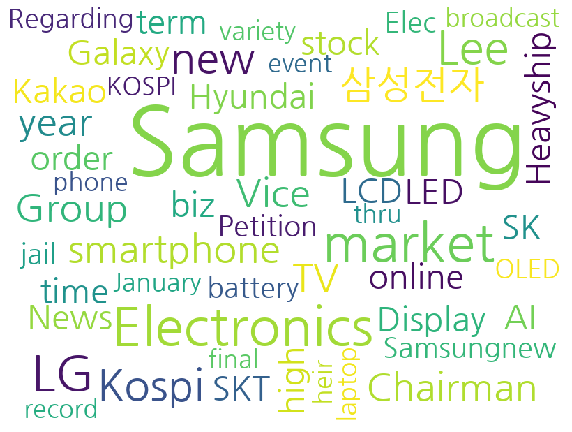

In [16]:
if __name__ == '__main__':
    # 1~200번게시글 까지 크롤링
    get_titles(1, 100)
    # 단어 30개까지 wordcloud로 출력
    make_wordcloud(50)